
# 🧪 LAB 4A — Regression Models (Marketing Dataset)
🎓 **Bologna Business School — Machine Learning Lab**  
📁 Dataset: `regression_example.csv`

---

## 🎯 Learning Objectives
- Load and clean a regression dataset  
- Visualise predictors vs target  
- Analyse correlations  
- Train and compare multiple regression models  
- Evaluate models using RMSE and R²


## 🛠️ Setup

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
random_state=42

## 📥 Load and Clean Dataset

In [2]:
df = pd.read_csv("regression_example.csv").dropna()
print("Final shape:", df.shape)
df.head()


Final shape: (570, 10)


,idx,F0,F1,F2,F3,F4,F5,F6,F7,response
1,1,0.644764,0.007172,0.004493,4.168748,-0.622817,1.855366,-0.540468,1.141118,151.951717
2,2,0.890241,1.080162,0.168031,0.002733,0.522478,0.407804,1.629592,-1.102599,117.280863
3,3,-0.212410,-1.034267,1.843441,4.486992,-0.610050,0.734101,-0.142660,-0.172119,229.358473
4,4,-0.827402,-2.048496,-0.066242,1.361695,1.268456,-1.084906,1.986556,0.425511,230.153189
5,5,-0.635465,-1.112850,-0.330580,6.141348,1.914527,0.408895,-0.364722,-0.731382,-261.116572


In [3]:
X = df.drop(columns=["idx", "response"])
y = df["response"]

## 🔀 Train / Test Split

In [4]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=random_state
)
print("Train:", X_train.shape, "| Test:", X_test.shape)

Train: (399, 8) | Test: (171, 8)


## 📊 Features vs Target

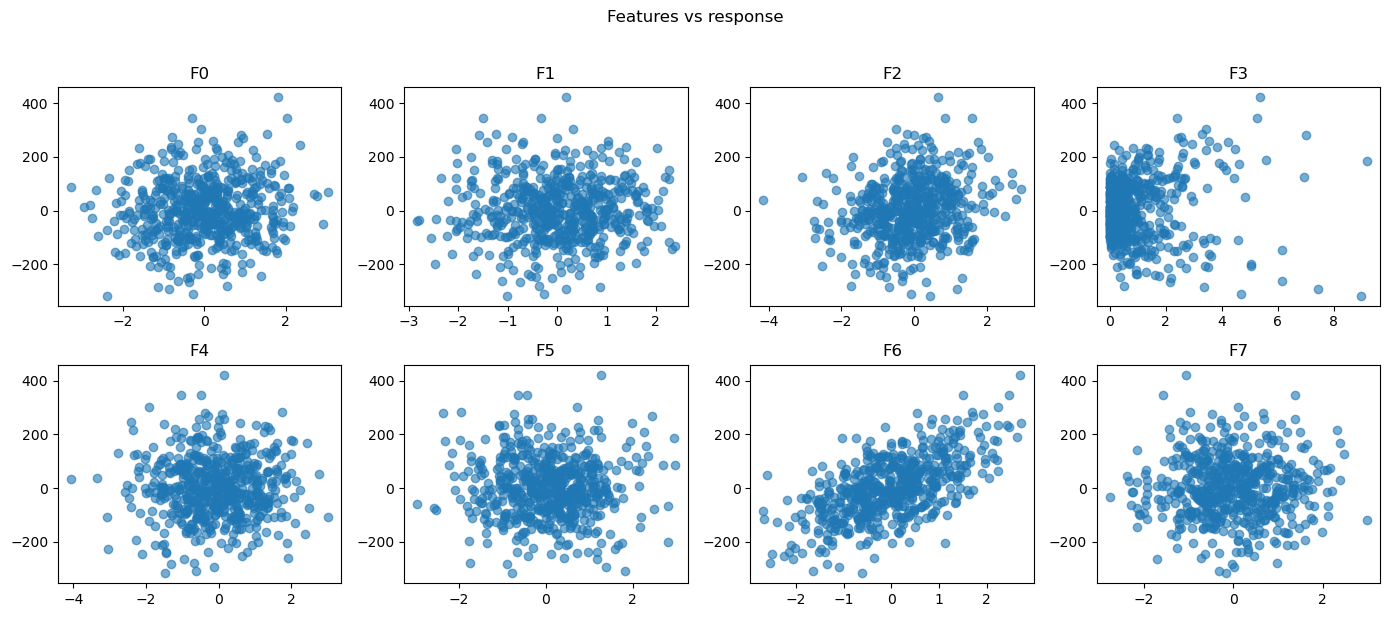

In [5]:
fig, ax = plt.subplots(2, 4, figsize=(14, 6))
for a, col in zip(ax.ravel(), X.columns):
    a.scatter(X[col], y, alpha=0.6)
    a.set_title(col)
    plt.suptitle("Features vs response", y=1.02)
    plt.tight_layout()
plt.show()

## 🧠 Correlation Matrix

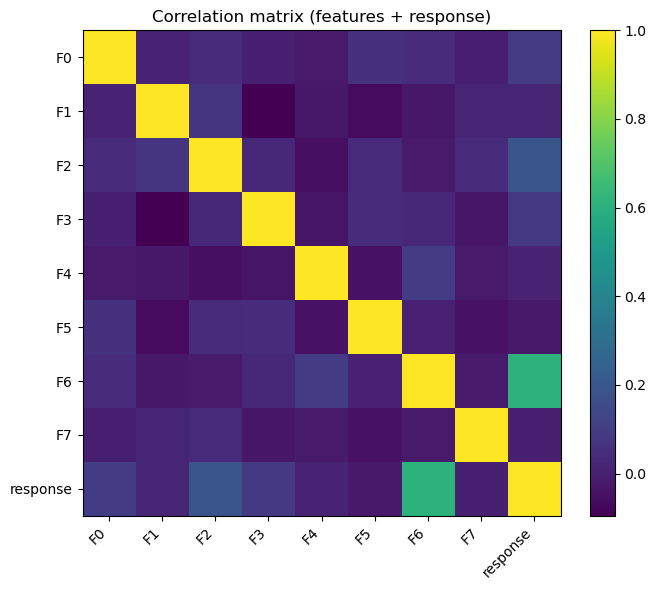

In [6]:
corr = df.drop(columns=["idx"]).corr(numeric_only=True)
plt.figure(figsize=(7,6))
plt.imshow(corr, aspect="auto")
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha="right")
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation matrix (features + response)")
plt.tight_layout()
plt.show()

In [7]:
corr_target = corr["response"].drop("response")
best_feature = corr_target.abs().idxmax()
print("Best feature:", best_feature, "| corr =", corr_target[best_feature])

Best feature: F6 | corr = 0.6131988316822142


## 🧰 Helper Function

In [8]:
def eval_model(name, model, Xtr, Xte):
    model.fit(Xtr, y_train)
    pred = model.predict(Xte)
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    r2 = r2_score(y_test, pred)
    return name, rmse, r2, pred

## 🧪 Train Models

In [9]:

results = []

m1 = eval_model(f"Linear uni ({best_feature})", LinearRegression(),
                X_train[[best_feature]], X_test[[best_feature]])
results.append(m1[:3]); pred_uni = m1[3]

m2 = eval_model("Linear multi", LinearRegression(), X_train, X_test)
results.append(m2[:3]); pred_multi = m2[3]

dt = GridSearchCV(
    DecisionTreeRegressor(random_state=random_state),
    {"max_depth": range(1, 15)},
    cv=5, scoring="neg_mean_squared_error"
).fit(X_train, y_train).best_estimator_

m3 = eval_model("Decision Tree (tuned)", dt, X_train, X_test)
results.append(m3[:3]); pred_dt = m3[3]

rf = GridSearchCV(
    RandomForestRegressor(n_estimators=200, random_state=random_state),
    {"max_depth": range(1, 11)},
    cv=5, scoring="neg_mean_squared_error", n_jobs=-1
).fit(X_train, y_train).best_estimator_

m4 = eval_model("Random Forest (tuned)", rf, X_train, X_test)
results.append(m4[:3]); pred_rf = m4[3]


## 🏁 Model Comparison

In [14]:
comparison = (
    pd.DataFrame(results, columns=["Model", "RMSE", "R²"])
      .sort_values("RMSE")
      .round(3)
)
display(comparison)

# Lower RMSE → better model
# Higher R² → better model

,Model,RMSE,R²
0,Linear uni (F6),92.383,0.434
1,Linear multi,93.242,0.424
3,Random Forest (tuned),95.983,0.389
2,Decision Tree (tuned),96.465,0.383


## 📈 Predictions vs True

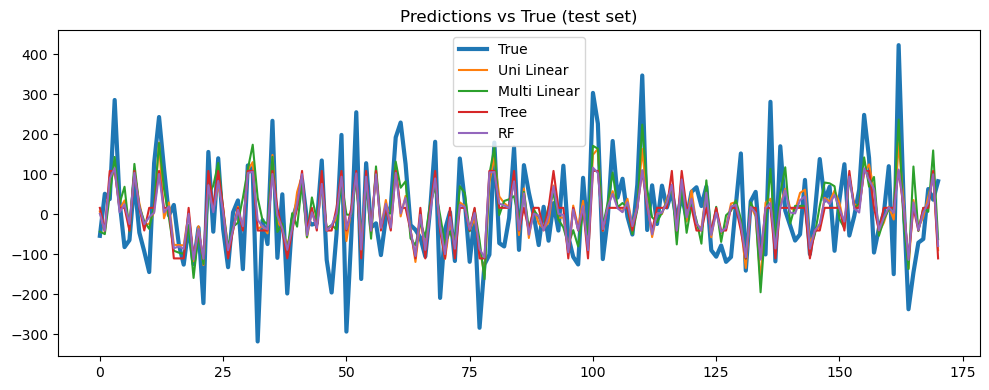

In [15]:

plt.figure(figsize=(10, 4))
plt.plot(y_test.values, label="True", linewidth=3)
plt.plot(pred_uni, label="Uni Linear")
plt.plot(pred_multi, label="Multi Linear")
plt.plot(pred_dt, label="Tree")
plt.plot(pred_rf, label="RF")
plt.title("Predictions vs True (test set)")
plt.legend()
plt.tight_layout()
plt.show()
